In [1]:
#libraries importation
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#dataframe importation
df=pd.read_csv(r"C:\Users\HomePC\Documents\Machine Learning\Time Series Supply Chain Dataset\supply_chain_deliveries.csv")

In [5]:
#preview of the first 5 rows
df.head(5)

,WorkDate,Customer,Location,BusinessType,OrderCount,NumberOfPieces,TotalRevenue
0,02/01/2020,Amazon,Chicago,Final Mile,38,190,2084.09
1,02/01/2020,Home Depot,Sacramento,Final Mile,34,136,6153.01
2,02/01/2020,Home Depot,Chicago,Final Mile,43,215,15691.72
3,02/01/2020,Home Depot,Detroit,Final Mile,41,164,6490.39
4,02/01/2020,Home Depot,Atlanta,Final Mile,44,220,10069.65


In [7]:
#to get the basic high level information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126255 entries, 0 to 126254
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   WorkDate        126255 non-null  object 
 1   Customer        126255 non-null  object 
 2   Location        126255 non-null  object 
 3   BusinessType    126255 non-null  object 
 4   OrderCount      126255 non-null  int64  
 5   NumberOfPieces  126255 non-null  int64  
 6   TotalRevenue    126255 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 6.7+ MB


In [9]:
#check the datatypes 
df.dtypes

WorkDate           object
Customer           object
Location           object
BusinessType       object
OrderCount          int64
NumberOfPieces      int64
TotalRevenue      float64
dtype: object

In [11]:
#Check for NAs in the dataset
df.isna().sum()

WorkDate          0
Customer          0
Location          0
BusinessType      0
OrderCount        0
NumberOfPieces    0
TotalRevenue      0
dtype: int64

In [13]:
#to get overview of the statistical value of dataframe
df.describe()

,OrderCount,NumberOfPieces,TotalRevenue
count,126255.000000,126255.000000,126255.000000
mean,27.487759,137.447871,2619.589379
std,23.390942,119.446285,3732.441225
min,1.000000,3.000000,26.020000
25%,11.000000,52.000000,688.610000
50%,20.000000,100.000000,1450.790000
75%,37.000000,185.000000,2998.130000
max,149.000000,1015.000000,64318.070000


In [15]:
#to view the names of the columns in the dataframe
df.columns

Index(['WorkDate', 'Customer', 'Location', 'BusinessType', 'OrderCount',
       'NumberOfPieces', 'TotalRevenue'],
      dtype='object')

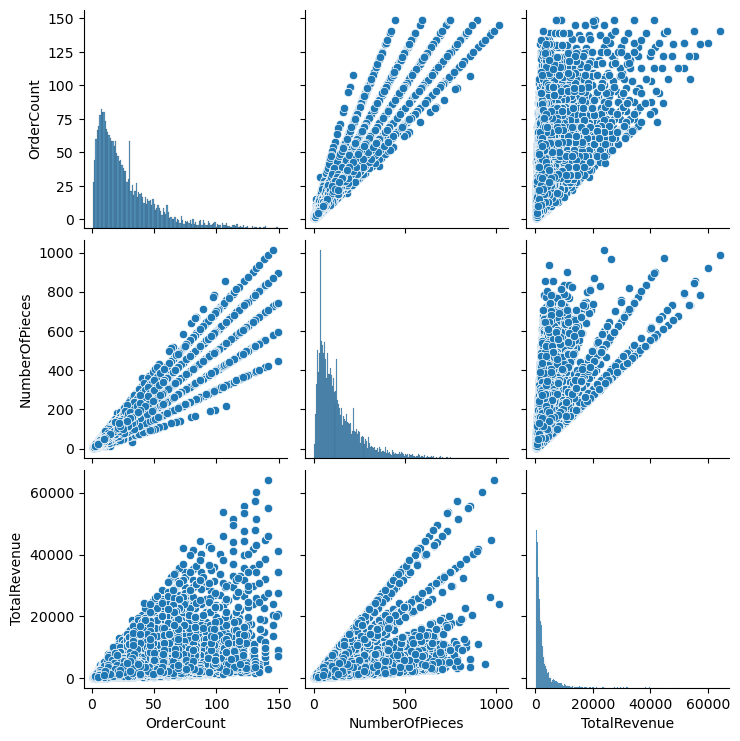

In [17]:
#lets plot a pairplot to gain visual description of the dataframe
sns.pairplot(df)

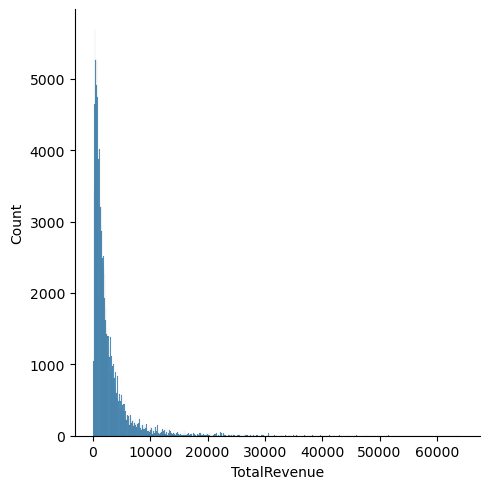

In [23]:
#lets check the distribution for the Total Revenue
sns.displot(df['TotalRevenue'])

In [21]:
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,OrderCount,NumberOfPieces,TotalRevenue
OrderCount,1.000000,0.978850,0.599626
NumberOfPieces,0.978850,1.000000,0.613441
TotalRevenue,0.599626,0.613441,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

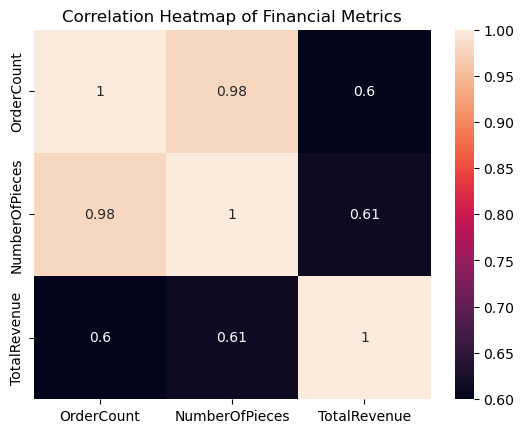

In [25]:
#LET PLOT THE FINANCIAL METRICS USING HEATMAP
sns.heatmap(correlation_matrix, annot=True)
plt.rcParams['figure.figsize']=(20,10)
plt.title('Correlation Heatmap of Financial Metrics')
plt.show

In [27]:
df.columns

Index(['WorkDate', 'Customer', 'Location', 'BusinessType', 'OrderCount',
       'NumberOfPieces', 'TotalRevenue'],
      dtype='object')

In [29]:
X=df[[ 'OrderCount','NumberOfPieces']]

In [31]:
y=df[['TotalRevenue']]

In [33]:
#lets call for the model to train test and split 
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#let import linear regression
from sklearn.linear_model import LinearRegression

In [39]:
Model1 = LinearRegression()

In [41]:
#lets fit the model on the training data
Model1.fit(X_train,y_train)

LinearRegression()

In [43]:
print(Model1.intercept_)

[-6.36787705]


In [45]:
#lets check the coefficient
Model1.coef_

array([[-3.22866256, 19.71511556]])

In [47]:
X_train.columns

Index(['OrderCount', 'NumberOfPieces'], dtype='object')

In [53]:
#lets make the coefficent into a dataframe
cdf=pd.DataFrame(Model1.coef_.flatten(),index=X.columns,columns=['Coeff'])

In [55]:
cdf

,Coeff
OrderCount,-3.228663
NumberOfPieces,19.715116


In [57]:
#Lets start make prediction
predictions = Model1.predict(X_test)

In [59]:
predictions

array([[ 184.32595345],
       [7716.73225822],
       [3521.46798721],
       ...,
       [1137.79510595],
       [3807.50873296],
       [4188.89639396]])

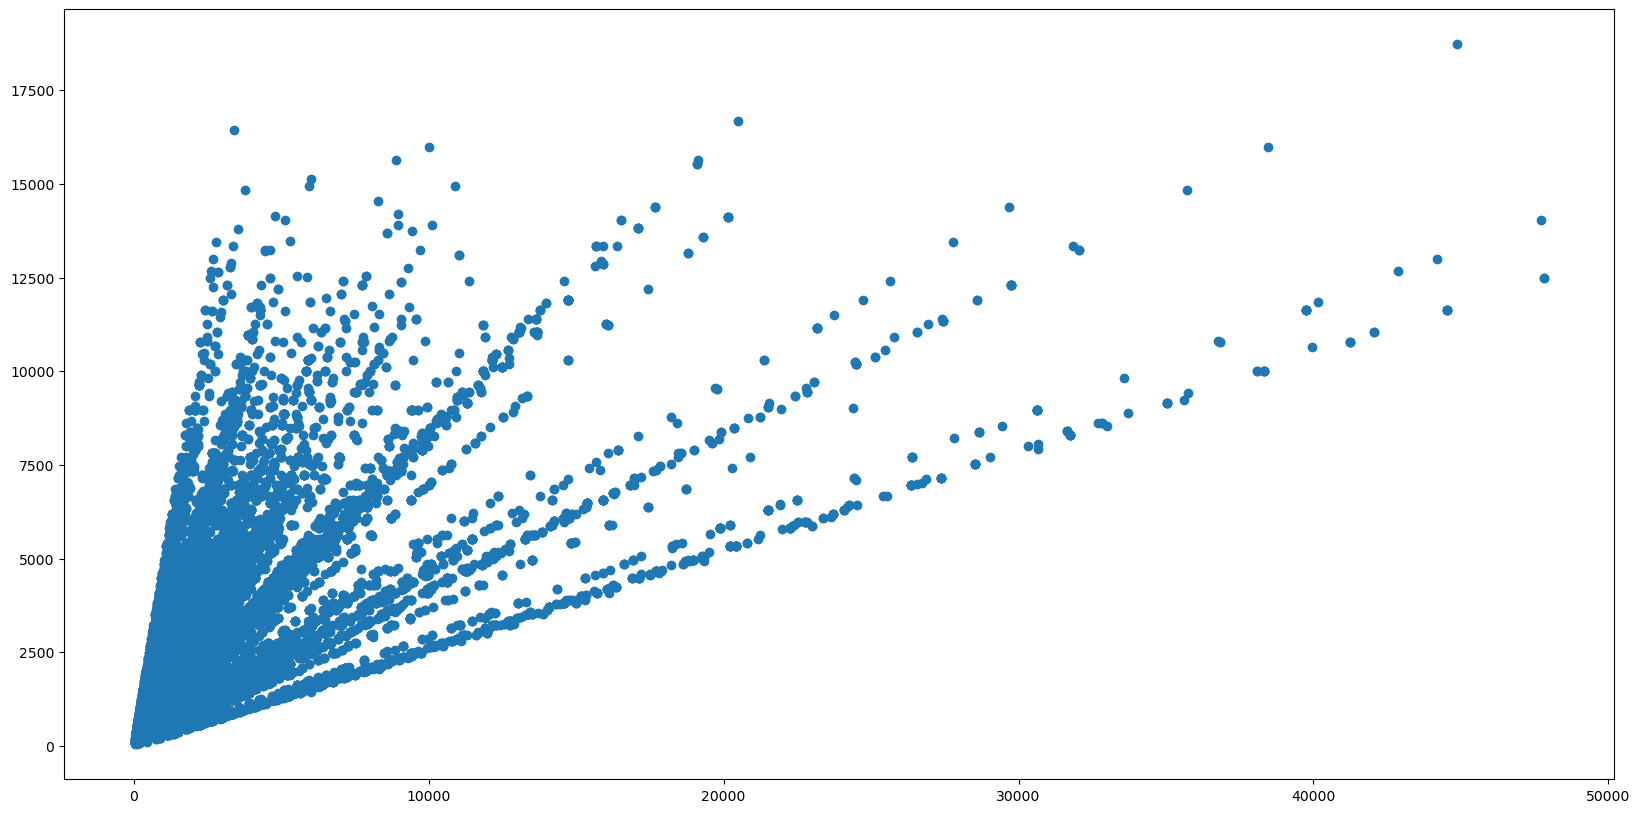

In [61]:
#let plot the predictions on a scatterplot
plt.scatter(y_test,predictions)

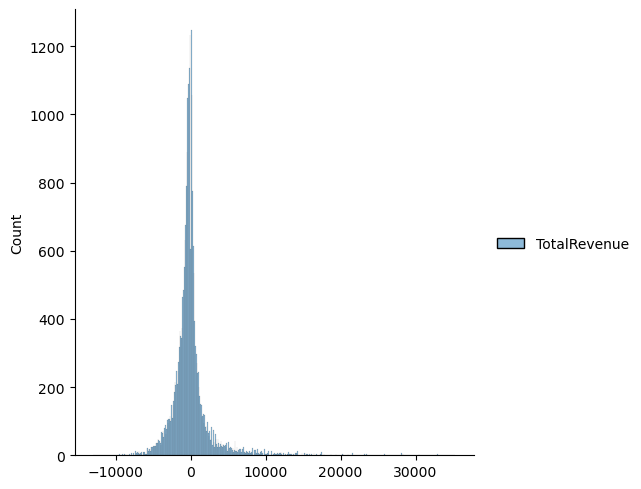

In [63]:
# plot of the residual of the distribution 
sns.displot((y_test-predictions))

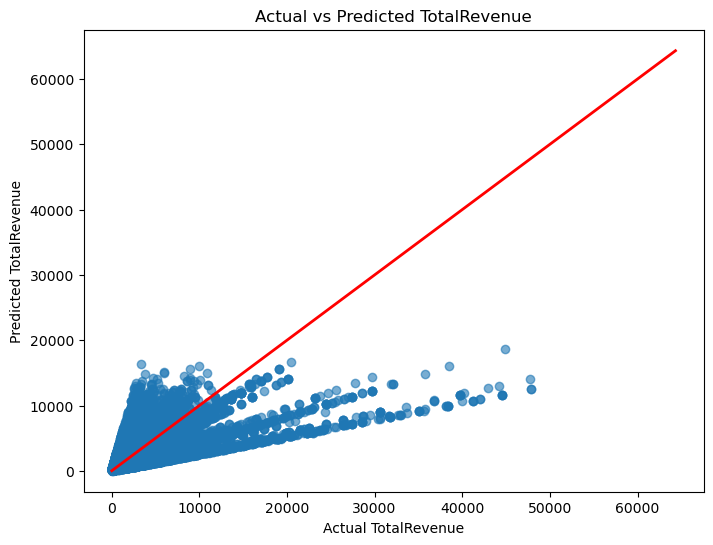

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel('Actual TotalRevenue')
plt.ylabel('Predicted TotalRevenue')
plt.title('Actual vs Predicted TotalRevenue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # diagonal line
plt.show()

In [73]:
from sklearn import metrics

In [75]:
metrics.mean_absolute_error(y_test,predictions)

1532.3014860424607

In [77]:
metrics.mean_squared_error(y_test,predictions)

8579145.209497126

In [79]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

2929.017789208035